# NOW23 MMC Plots

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil, io
for x in amrwindfedirs: sys.path.insert(1, x)

%matplotlib inline

In [2]:
import postproengine as ppeng
import ruamel.yaml    
yaml = ruamel.yaml.YAML(typ='rt')
Loader= yaml.load
loaderkwargs = {}
dumperkwargs = {}

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
yamlstring="""
instantaneousplanes:
  - name: coarse XY plane
    ncfile: /nscratch/lcheung/FLOWMAS/microscale_surrogate_wakes/MMC_Stable_2020_02/2020-02-04-8100/MMC_NOW23_08_5m/post_processing/hubheight_00000.nc
    iters:  [] # 720,  , 1440,  2880, 4320, 5760, -1]
    times: [3600, 7200, 10800, 11700]
    iplane: 0
    xaxis: x
    yaxis: y
    # --- plot stuff here ---
    plot:
        title: 'NOW23 $U_h$ t={(time/3600.0):0.1f}hr'
        plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"    
        clevels: 'np.linspace(0, 15, 151)'
        xlabel: 'X [m]'
        ylabel: 'Y [m]'
        fontsize: 8
    
  - name: coarse SW plane
    ncfile: /nscratch/lcheung/FLOWMAS/microscale_surrogate_wakes/MMC_Stable_2020_02/2020-02-04-8100/MMC_NOW23_08_5m/post_processing/sw_00000.nc
    iters:  [] # 720,  , 1440,  2880, 4320, 5760, -1]
    times: [3600, 7200, 10800, 11700]
    iplane: 0
    xaxis: y
    yaxis: z
    # --- plot stuff here ---
    plot:
        title: 'NOW23 $U_h$ t={(time/3600.0):0.1f}hr'
        plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"    
        clevels: 'np.linspace(0, 17, 171)'
        xlabel: 'Y [m]'
        ylabel: 'Z [m]'       
"""
fhh = io.StringIO(yamlstring)
yamldicthh = Loader(fhh, **loaderkwargs)

Initialized instantaneousplanes
Running instantaneousplanes
extracting iter 2880
extracting iter 5760
extracting iter 8640
extracting iter 9360
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 2880
extracting iter 5760
extracting iter 8640
extracting iter 9360
Initialized plot inside instantaneousplanes
Executing plot


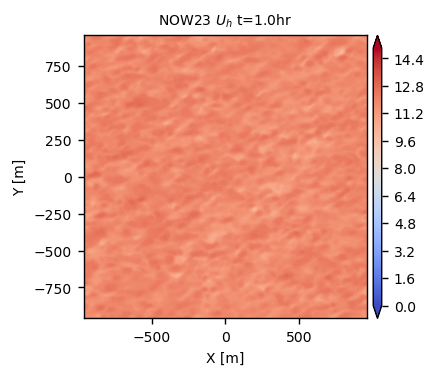

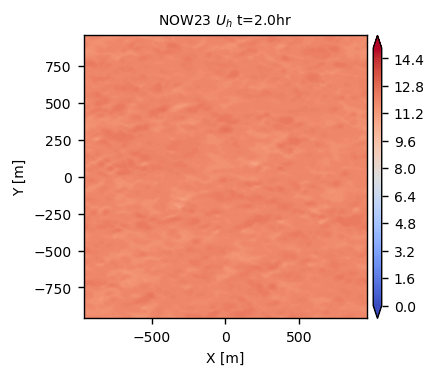

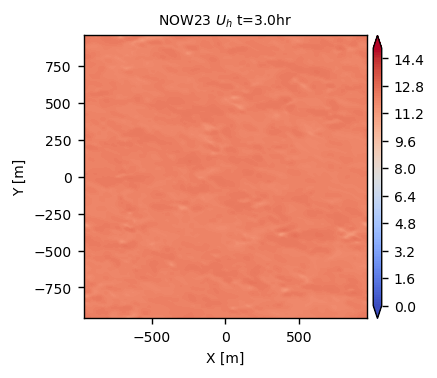

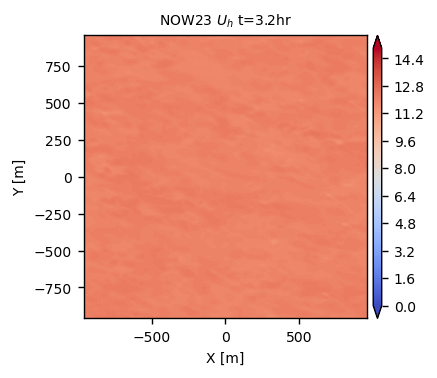

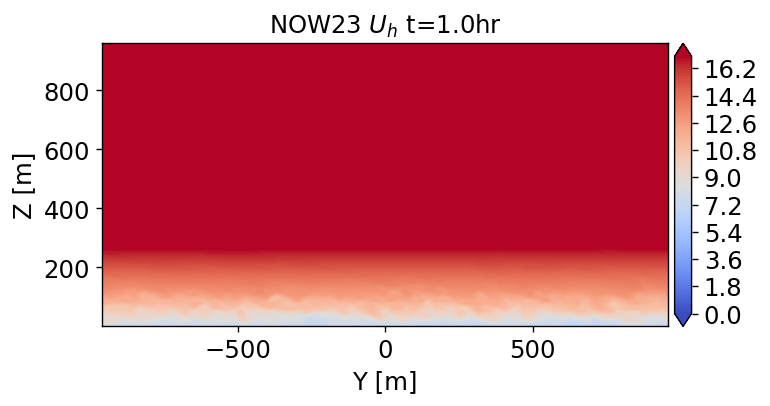

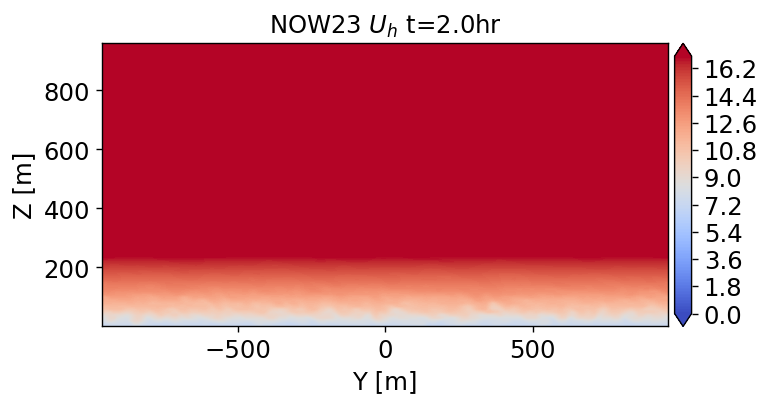

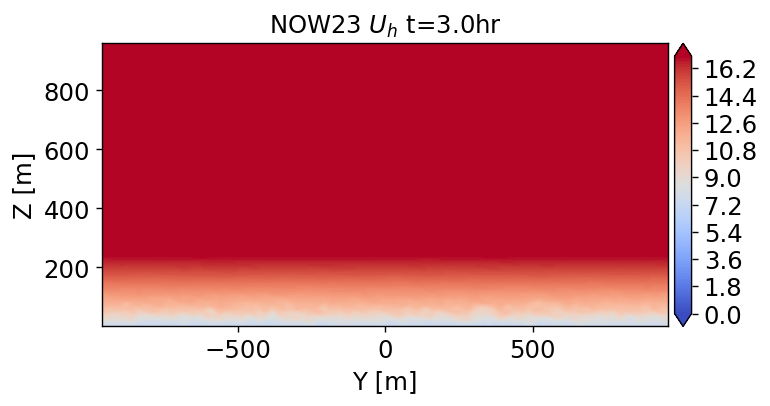

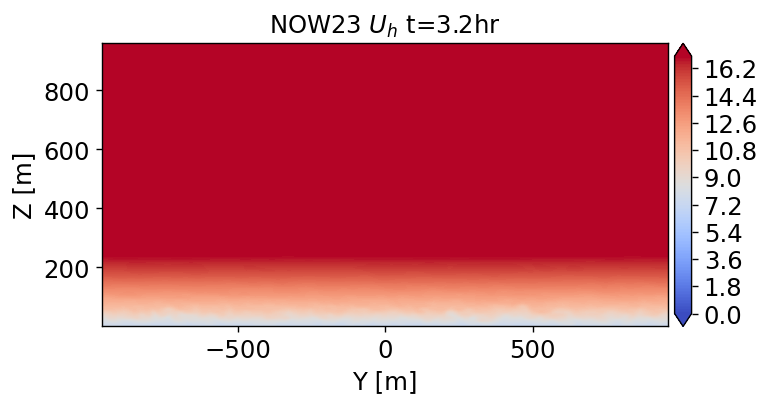

In [4]:
# Run the driver
ppeng.driver(yamldicthh, verbose=True)